<a href="https://colab.research.google.com/github/ram-shankar58/Anamoly-detector/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
df = pd.read_csv('/content/India_GDP_Data.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Assuming 'Percentage_Growth' is the column on which you want to perform anomaly detection
# Remove the extra space in the column name
series = df['Percentage_Growth ']

# Fit the SARIMA model with the best combination of parameters based on the lowest AIC value
model = SARIMAX(series, order=(0, 2, 0), seasonal_order=(2, 1, 11, 12))
model_fit = model.fit()

# Use 'linear' option for the predict method to get the difference between series and predictions
yhat = model_fit.predict(start=0, end=len(series) - 1, typ='linear')

# Calculate residuals
residuals = yhat  # No need to subtract series from yhat since yhat is already the difference
residuals = pd.DataFrame(residuals)

# Calculate statistics on the residuals to find anomalies
residuals_std = residuals.std()
residuals_mean = residuals.mean()




The year having anomaly is:  2020
The year having anomaly is:  1979


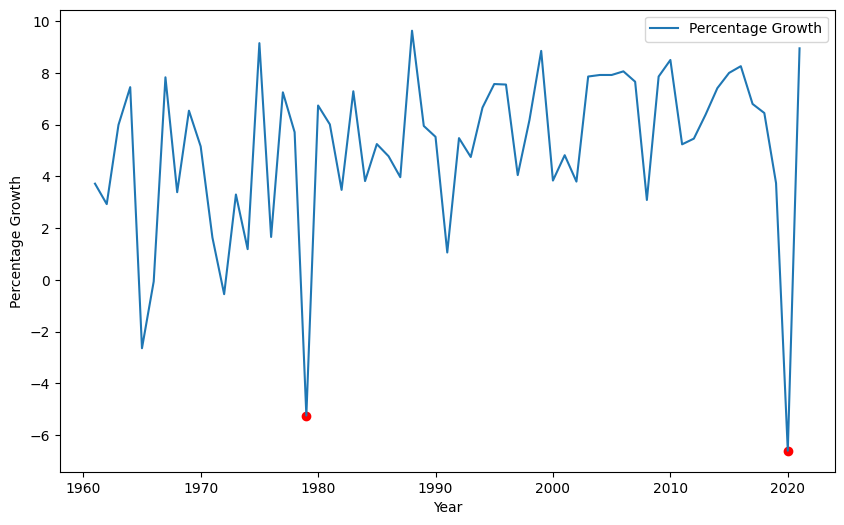

In [98]:
# Assuming the rest of your code is above this line

# Calculate the mean and standard deviation of the 'Percentage_Growth ' column
percentage_growth_mean = df['Percentage_Growth '].mean()
percentage_growth_std = df['Percentage_Growth '].std()

# Any data point that deviates significantly from the mean could be considered an anomaly.
# Try different values of standard deviation or use other methods like IQR or Z-score
anomalies = df[(df['Percentage_Growth '] - percentage_growth_mean).abs() > 2.5 * percentage_growth_std]

# Get the index values (years) of the anomalies
anomaly_indices = anomalies.index.tolist()

# Print the years with anomalies as "2022-{year}"
for index in anomaly_indices:
 print("The year having anomaly is: ", 2021-index)

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], series, label='Percentage Growth')

# Plot anomalies
for index in anomaly_indices:
   anomaly_value = df.loc[index, 'Percentage_Growth ']
   plt.scatter(df['Year'][index], anomaly_value, color='red')

plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.legend()
plt.show()
